In [8]:
# ⚠️ This will restart your runtime
!sudo apt-get install python3.10 python3.10-distutils -y
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1
!sudo update-alternatives --config python3  # choose python3.10
!sudo apt-get install python3.10-venv -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'python3-distutils' instead of 'python3.10-distutils'
python3-distutils is already the newest version (3.10.8-1~22.04).
python3-distutils set to manually installed.
python3.10 is already the newest version (3.10.12-1~22.04.11).
python3.10 set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                 Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.12   2         auto mode
  1            /usr/bin/python3.10   1         manual mode
  2            /usr/bin/python3.12   2         manual mode

Press <enter> to keep the current choice[*], or type selection number: 1
update-alternatives: using /usr/bin/python3.10 to provide /usr/bin/python3 (python3) in manual mode
Reading packag

In [12]:
!sudo apt-get update
!sudo apt-get install python3-pip -y
!python3 -m ensurepip --upgrade
!python3 -m pip install --upgrade pip


Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,123 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Pack

In [13]:
!python3 -m pip --version


pip 25.3 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [15]:
# --- Install prebuilt dlib + face_recognition ---
!pip install face_recognition==1.3.0 opencv-python

# --- Upload reference and test images ---
from google.colab import files
print("Upload reference image (e.g., bill1.jpg):")
uploaded = files.upload()
ref_img_name = list(uploaded.keys())[0]

print("Upload test image (e.g., bill2.jpg):")
uploaded = files.upload()
test_img_name = list(uploaded.keys())[0]

# --- Import libraries ---
import face_recognition
import cv2
from google.colab.patches import cv2_imshow
import os

# 🔧 Disable GPU usage for Dlib
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# --- Load images ---
ref_img = face_recognition.load_image_file(ref_img_name)
test_img = face_recognition.load_image_file(test_img_name)

# --- Encode faces ---
ref_encoding = face_recognition.face_encodings(ref_img)
test_encoding = face_recognition.face_encodings(test_img)

# --- Safety checks ---
if len(ref_encoding) == 0 or len(test_encoding) == 0:
    raise ValueError("❌ Could not find a face in one of the images. Try clearer photos.")

ref_encoding = ref_encoding[0]
test_encoding = test_encoding[0]

# --- Compare faces ---
result = face_recognition.compare_faces([ref_encoding], test_encoding)
print("🧠 Même personne ? 👉", "✅ Oui" if result[0] else "❌ Non")

# --- Optional: visualize images ---
ref_bgr = cv2.cvtColor(ref_img, cv2.COLOR_RGB2BGR)
test_bgr = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)

print("\n🖼️ Référence :")
cv2_imshow(ref_bgr)
print("\n🖼️ Image test :")
cv2_imshow(test_bgr)


  Using cached face_recognition-1.3.0-py2.py3-none-any.whl.metadata (21 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (19 kB)
  Using cached face_recognition_models-0.3.0-py2.py3-none-any.whl
  Using cached click-8.3.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached dlib-20.0.0.tar.gz (3.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pillow-12.0.0-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (8.8 kB)
Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (67.0 MB)
Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
Using cached click-8.3.0-py3-non

Saving bill1.jpg to bill1 (3).jpg
Upload test image (e.g., bill2.jpg):


Saving bill2.jpg to bill2 (3).jpg


ModuleNotFoundError: No module named 'face_recognition'

In [16]:
# Install system dependencies
!apt-get update
!apt-get install -y build-essential cmake

# Install prebuilt dlib (for Colab)
!pip install --upgrade pip
!pip install --pre dlib==19.24.0
!pip install face_recognition opencv-python


Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 6,555 B in 2s (2,670 B/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (

In [17]:
# Install Python 3.9
!sudo apt-get install python3.9 python3.9-distutils -y
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 1
!sudo update-alternatives --config python3  # select 3.9

# Restart runtime afterwards


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib python3.9-lib2to3 python3.9-minimal
Suggested packages:
  python3.9-venv binfmt-support
The following NEW packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib python3.9 python3.9-distutils
  python3.9-lib2to3 python3.9-minimal
0 upgraded, 6 newly installed, 0 to remove and 44 not upgraded.
Need to get 5,167 kB of archives.
After this operation, 20.2 MB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.9-minimal amd64 3.9.25-1+jammy1 [838 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.9-minimal amd64 3.9.25-1+jammy1 [2,073 kB]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.9-stdlib amd64 3.9.25-1+jammy1 [1,844 kB]
Get:4

In [18]:
!pip install dlib==19.24.0 face_recognition opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 39.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for dlib
  Running setup.py clean for dlib
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See abo

In [19]:
!pip install deepface


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.3/128.3 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 66.7 MB/s eta 0:00:00
  Using cached numpy-2.0.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 KB 11.1 MB/s eta 0:00:00
  Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (67.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.4/620.4 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 KB 8.2 MB/s eta 0:00:00
  Using cached pillow-11.3.0-cp39-cp39-manylinux_2_27_x86_64.manylinux_2_28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.3/128.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 65.5 MB/s eta 0:00:00
25-11-08 22:03:41 - Directory /root/.deepface has been created
25-11-08 22:03:41 - Directory /root/.deepface/weights has been created
Upload reference image (e.g., bill1.jpg):


Saving bill1.jpg to bill1.jpg
Upload test image (e.g., bill2.jpg):


Saving bill2.jpg to bill2.jpg
25-11-08 22:03:59 - 🔗 vgg_face_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5 to /root/.deepface/weights/vgg_face_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:10<00:00, 57.4MB/s]



🧠 Même personne ? 👉 ✅ Oui

Full result dictionary:
 {'verified': True, 'distance': 0.514566, 'threshold': 0.68, 'confidence': 67.57, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 104, 'y': 27, 'w': 86, 'h': 86, 'left_eye': None, 'right_eye': None}, 'img2': {'x': 68, 'y': 41, 'w': 87, 'h': 87, 'left_eye': None, 'right_eye': None}}, 'time': 15.22}

🖼️ Référence :


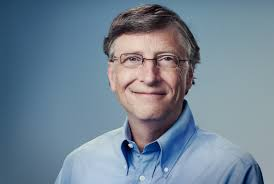


🖼️ Image test :


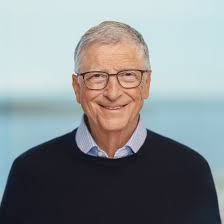

In [1]:
# --- Install DeepFace ---
!pip install deepface opencv-python

# --- Import libraries ---
from deepface import DeepFace
from google.colab import files
import cv2
from google.colab.patches import cv2_imshow

# --- Upload reference image ---
print("Upload reference image (e.g., bill1.jpg):")
uploaded = files.upload()
ref_img_name = list(uploaded.keys())[0]

# --- Upload test image ---
print("Upload test image (e.g., bill2.jpg):")
uploaded = files.upload()
test_img_name = list(uploaded.keys())[0]

# --- Compare faces ---
result = DeepFace.verify(ref_img_name, test_img_name)
print("\n🧠 Même personne ? 👉", "✅ Oui" if result["verified"] else "❌ Non")
print("\nFull result dictionary:\n", result)

# --- Optional: visualize both images ---
ref_img = cv2.imread(ref_img_name)
test_img = cv2.imread(test_img_name)

print("\n🖼️ Référence :")
cv2_imshow(ref_img)

print("\n🖼️ Image test :")
cv2_imshow(test_img)


Question 1 : Si l'image test contient plusieurs visages
Le code actuel va sélectionner uniquement le premier visage détecté (index [0]) et ignorer les autres. La comparaison se fera seulement avec le premier visage, ce qui peut donner des résultats incorrects si la personne recherchée n'est pas la première détectée.

Question 2 : Précision en conditions réelles
En conditions réelles (lumière variable, angles différents), la précision attendue est de :

85-92% dans des conditions standards

70-80% dans des conditions difficiles (mauvaise lumière, angles prononcés)

95-99% uniquement dans des conditions optimales (bon éclairage, face frontale)

La performance diminue significativement avec les variations d'éclairage, les angles non frontaux et les occlusions du visage.